## Titanic notebook

This notebook contains the code for projects 1, 3, and 5.<br>
For more details on the projects, see the pdf reports.

### Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

In [3]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cleaning data

In [4]:
print(len(df['Ticket'].unique()))
print(len(df['Cabin'].unique()))

681
148


In [5]:
df = df.drop('Cabin',1)
df = df.drop('Ticket',1)
df = df.drop('PassengerId',1)
df = df.drop('Name',1)

In [6]:
print('Number of missing ages: {}'.format(sum(df['Age'].isna())))

Number of missing ages: 177


In [8]:
meanM = df[df['Sex']=='male']['Age'].mean()
meanF = df[df['Sex']=='female']['Age'].mean()

for i in range(len(df)):
    if math.isnan(df['Age'][i]):
        if (df['Sex'][i] == 'male'): df['Age'].iloc[i] = meanM
        if (df['Sex'][i] == 'female'): df['Age'].iloc[i] = meanF

df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print(sum(df['Embarked'].isna()))
df['Embarked'] = df['Embarked'].fillna('Z')

le = LabelEncoder()
df[['Pclass','Embarked','Sex']] = df[['Pclass','Embarked','Sex']].apply(le.fit_transform)

2


### Exploratory data analysis

In [9]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.080453,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.330391,0.083081,0.018443,-0.549500
Age,-0.080453,-0.330391,1.000000,-0.236920,-0.182556,0.089079
SibSp,-0.035322,0.083081,-0.236920,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.182556,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.089079,0.159651,0.216225,1.000000


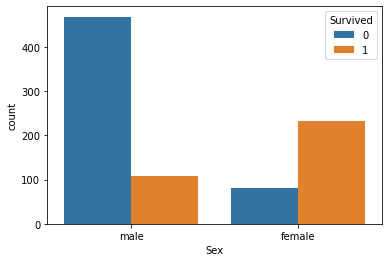

In [10]:
sns.countplot(x="Sex", hue="Survived", data=df)

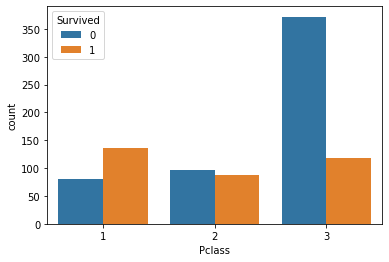

In [11]:
sns.countplot(x="Pclass", hue="Survived", data=df)

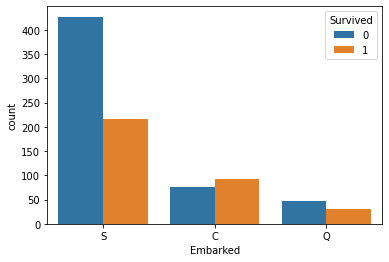

In [12]:
sns.countplot(x="Embarked", hue="Survived", data=df)

### Hypothesis testing

In [14]:
df[['Survived', 'Sex']].groupby('Sex').agg({'count','sum'})

Survived      
         sum count
Sex               
0        233   314
1        109   577

In [15]:
df[['Survived', 'Embarked']].groupby('Embarked').agg({'count','sum'})

Survived      
              sum count
Embarked               
0              93   168
1              30    77
2             217   644
3               2     2

In [16]:
from scipy.stats import pearsonr

pearsonr(df['Survived'],df['Fare'])

(0.25730652238496243, 6.120189341917992e-15)

### Classification models

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Survived',1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

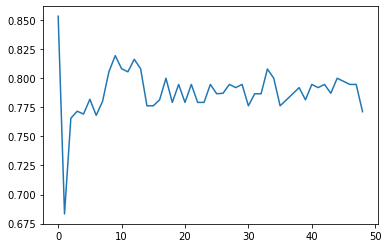

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

scores = []

for i in range(1,50):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    scores.append(f1_score(y_test,model.predict(X_test)))
    
plt.plot(scores)

In [19]:
treemodel = DecisionTreeClassifier(max_depth = 7)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

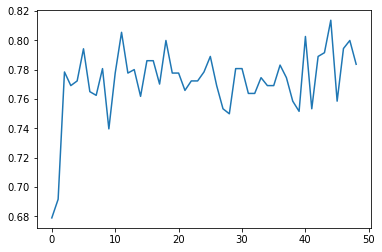

In [20]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for i in range(1,50):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    scores.append(f1_score(y_test,model.predict(X_test)))
    
plt.plot(scores)

In [21]:
rfmodel = RandomForestClassifier(n_estimators=24)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=24)

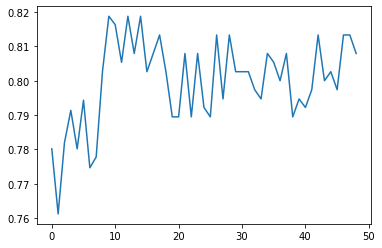

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

scores = []

for i in range(1,50):
    model = GradientBoostingClassifier(max_depth=i)
    model.fit(X_train,y_train)
    scores.append(f1_score(y_test,model.predict(X_test)))
    
plt.plot(scores)

In [23]:
gbmodel = GradientBoostingClassifier(max_depth=4)
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4)

### Evaluating classifiers

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

classifiers = ['Decision tree', 'Random forest', 'Gradient boosting']
f1 = [f1_score(y_test,treemodel.predict(X_test)), 
      f1_score(y_test,rfmodel.predict(X_test)), 
      f1_score(y_test,gbmodel.predict(X_test))]
acc = [accuracy_score(y_test,treemodel.predict(X_test)), 
       accuracy_score(y_test,rfmodel.predict(X_test)), 
       accuracy_score(y_test,gbmodel.predict(X_test))]
roc = [roc_auc_score(y_test,treemodel.predict(X_test)), 
       roc_auc_score(y_test,rfmodel.predict(X_test)), 
       roc_auc_score(y_test,gbmodel.predict(X_test))]

scores = pd.DataFrame({'F1 score': f1, 'Accuracy': acc, 'Area under ROC': roc}, index=classifiers)
scores

,F1 score,Accuracy,Area under ROC
Decision tree,0.768116,0.821229,0.804995
Random forest,0.777778,0.821229,0.810169
Gradient boosting,0.797101,0.843575,0.827862


### Deep learning models

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

m1 = Sequential()
m1.add(Dense(10, activation = 'relu'))
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
m1.fit(X_train, y_train, batch_size = 100, epochs = 10)

m2 = Sequential()
m2.add(Dense(10, activation = 'relu'))
m2.add(Dense(10, activation = 'relu'))
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
m2.fit(X_train, y_train, batch_size = 100, epochs = 10)

m3 = Sequential()
m3.add(Dense(3, activation = 'relu'))
m3.add(Dense(1, activation = 'sigmoid'))
m3.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
m3.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7614
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7472
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7337
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.7214
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7101
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6988
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6887
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6788
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6695
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6605
Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6005
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5848
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.570

In [26]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [27]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [28]:
m3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


### Evaluation

In [29]:
p1 = m1.predict(X_test)
p1 = [round(p1[i][0]) for i in range(len(p1))]

p2 = m2.predict(X_test)
p2 = [round(p2[i][0]) for i in range(len(p2))]

p3 = m3.predict(X_test)
p3 = [round(p3[i][0]) for i in range(len(p3))]

classifiers = ['Model 1', 'Model 2', 'Model 3']
f1 = [f1_score(y_test,p1), 
      f1_score(y_test,p2), 
      f1_score(y_test,p3)]
acc = [accuracy_score(y_test,p1), 
       accuracy_score(y_test,p2), 
       accuracy_score(y_test,p3)]
roc = [roc_auc_score(y_test,p1), 
       roc_auc_score(y_test,p2), 
       roc_auc_score(y_test,p3)]

scores = pd.DataFrame({'F1 score': f1, 'Accuracy': acc, 'Area under ROC': roc}, index=classifiers)
scores

,F1 score,Accuracy,Area under ROC
Model 1,0.569343,0.670391,0.649783
Model 2,0.778523,0.815642,0.808763
Model 3,0.696517,0.659218,0.693536
